In [30]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from ydata_profiling import ProfileReport

In [31]:
def map_columns_to_ints(df):
    # Sex: Female = 0, Male = 1
    df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})

    # ChestPaintType: Atypical Angina = 0, Non-Anginal Pain = 1, Asymptomatic = 2, Typical Angina = 3 
    df['ChestPainType'] = df['ChestPainType'].map({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})

    # RestingECG: Normal = 0, ST-T Wave Abnormality = 1, Left Ventricular Hypertrophy = 2
    df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})

    # ExerciseAngina: No = 0, Yes = 1
    df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})

    # ST_Slope (at peak exercise): Up = 0, Flat = 1, Down = 2
    df['ST_Slope'] = df['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})
    
    return df

# No scaling

In [32]:
# Load dataset
df = pd.read_csv('./datasets/heart_disease/heart_disease.csv')

# Drop duplicates
df = df.drop_duplicates()

# Map columns with characters to integers
df = map_columns_to_ints(df)

# Split X and y
X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]].squeeze()

# Get X and y train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=0)

# Save datasets
X_train.to_pickle('./datasets/heart_disease/X_train.pkl')
y_train.to_pickle('./datasets/heart_disease/y_train.pkl')
X_test.to_pickle('./datasets/heart_disease/X_test.pkl')
y_test.to_pickle('./datasets/heart_disease/y_test.pkl')

# Yes scaling

In [33]:
# Load dataset
df = pd.read_csv('./datasets/heart_disease/heart_disease.csv')

# Drop duplicates
df = df.drop_duplicates()

# Map columns with characters to integers
df = map_columns_to_ints(df)

# Split X and y
X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]].squeeze()

# Get X and y train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=0)

# Scale data
features = ['Age', 
            'RestingBP', 
            'Cholesterol',  
            'FastingBS',
            'MaxHR',
            'Oldpeak']

scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

# Save datasets
X_train.to_pickle('./datasets/heart_disease/X_train_scaled.pkl')
y_train.to_pickle('./datasets/heart_disease/y_train_scaled.pkl')
X_test.to_pickle('./datasets/heart_disease/X_test_scaled.pkl')
y_test.to_pickle('./datasets/heart_disease/y_test_scaled.pkl')

# Scaling and PCA

Number of dimensions to keep: 6


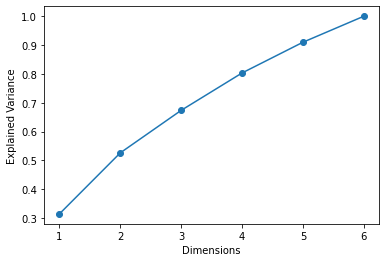

In [24]:
pca_cutoff = 0.95

# Get first dataset, which we want test cases from
df = pd.read_csv('./datasets/heart_disease/heart_disease.csv')

# Drop duplicates
df = df.drop_duplicates()

# Map columns with characters to integers
df = map_columns_to_ints(df)

# Split X and y
X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]].squeeze()

# Get X and y train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=0)

# Scale data
features = ['Age', 
            'RestingBP', 
            'Cholesterol',  
            'FastingBS',
            'MaxHR',
            'Oldpeak']

scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

# Find minimum number of dimensions that explain >= 'pca_cutoff' of variance
pca = PCA()
pca.fit(X_train[features])
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= pca_cutoff) + 1

# Apply reduction
pca = PCA(n_components=d)
X_train[features] = pca.fit_transform(X_train[features])
X_test[features] = pca.transform(X_test[features])

print(f'Number of dimensions to keep: {d}')

# Plot dimensions vs. explained variance
fig, ax = plt.subplots()
ax.set_xlabel("Dimensions")
ax.set_ylabel("Explained Variance")
ax.plot(list(range(1, 7)), cumsum, marker="o")
plt.show()

# Convert back to pandas dataframe
col_names = [f'PC{i}' for i in range(1, d + 1)]
X_train = pd.DataFrame(X_train, columns=col_names)
X_test = pd.DataFrame(X_test, columns=col_names)



# Pandas Profiling Report

In [5]:
profile = ProfileReport(df, title="Heart Disease Profiling Report")
profile.to_file("./plots/HD_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]